# Steps:
### 1. Take client name and legal entity name as input
### 2. Load relevant rows from dataset
### 3. Test stationarity of series using Dickey-Fuller Test, KPSS Test and Graphs
### 4. Convert non stationary series to stationary series

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller

### Take user input and load data

In [4]:
client = str(input("Enter Client Name : "))

Enter Client Name : HSBC


In [5]:
le = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))

Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


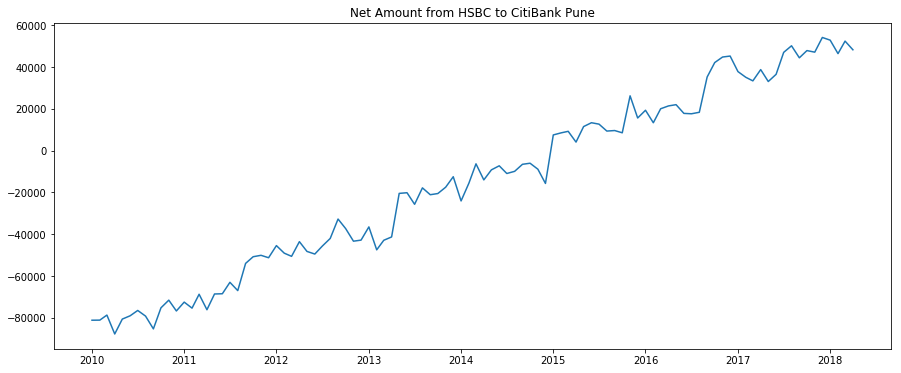

In [6]:
df = pd.read_csv(r'dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == le)]['Net Amount']
#print(df[df['Client Name'] == 'JP Morgan'])
#print(ts)
#ts.dropna(inplace = True)
#print(len(ts))
plt.title(f'Net Amount from {client} to {le}')
plt.plot(ts)
plt.show()

Text(0.5,1,'Moving Average of the data to show the trend')

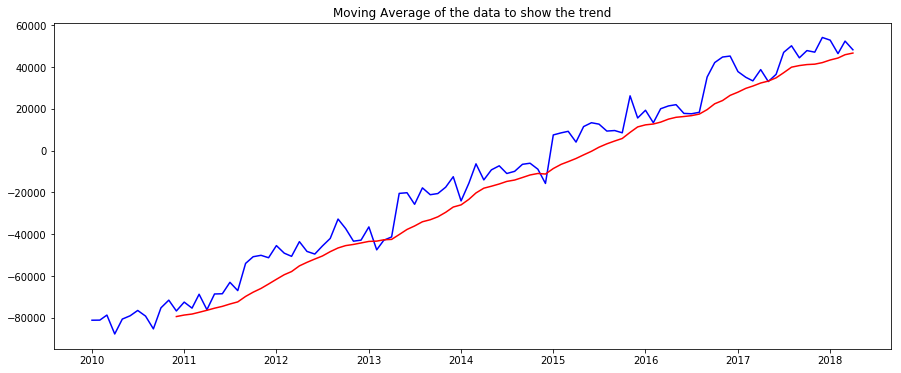

In [7]:
# Moving Average to show the trend

rolmean = ts.rolling(window=12,center=False).mean()
orig = plt.plot(ts.index.to_pydatetime(), ts.values, color='blue',label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='red', label='Rolling Mean')
plt.title('Moving Average of the data to show the trend')

### Test stationarity

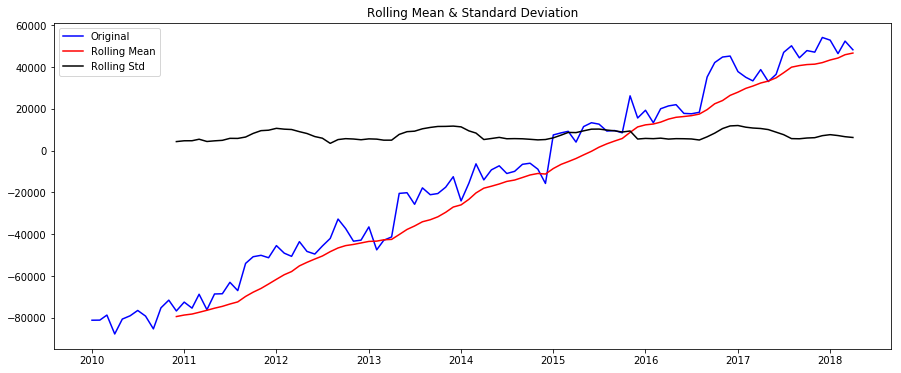

In [8]:
#Test stationarity using graphs
def test_stationarity(timeseries):
    
    timeseries.dropna(inplace = True)
    #print(len(timeseries))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(ts)

In [9]:
#Perform Dickey-Fuller test:
def df_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')
    
df_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -0.508136
p-value                         0.890419
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
Result: The series is not stationary


In [10]:
# Perform KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')



In [11]:
kpss_test(ts)

KPSS Statistic: 0.8744422836755968
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\divya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [12]:
kpss_test(ts, regression='ct')

KPSS Statistic: 0.07148738367472447
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


C:\Users\divya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [13]:
'''
Result:
if a series is stationary according to the KPSS test by setting regression='ct' 
and is not stationary according to the ADF test, 
it means the series is stationary around a deterministic trend
'''

"\nResult:\nif a series is stationary according to the KPSS test by setting regression='ct' \nand is not stationary according to the ADF test, \nit means the series is stationary around a deterministic trend\n"

### Convert to stationary

In [14]:
ts_log = np.log(ts)
ts_log.head()

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Date
2010-01-01   NaN
2010-02-01   NaN
2010-03-01   NaN
2010-04-01   NaN
2010-05-01   NaN
Name: Net Amount, dtype: float64

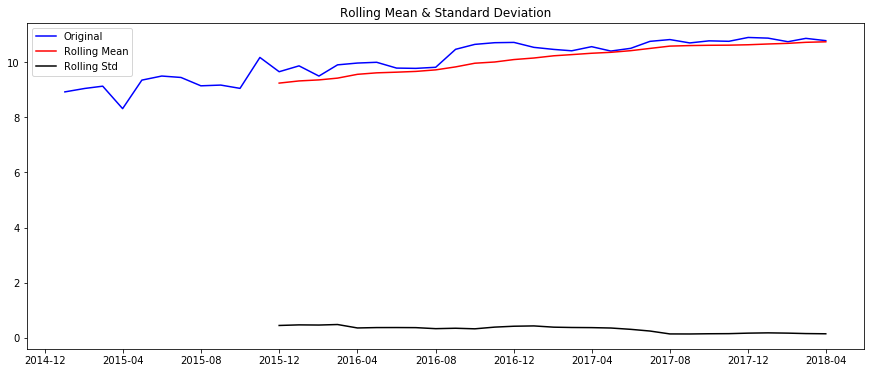

In [15]:
test_stationarity(ts_log)

In [16]:
df_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                 -2.733465
p-value                         0.068424
#Lags Used                      9.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
Result: The series is not stationary


In [17]:
# Applying differencing 
ts_log_diff = ts_log - ts_log.shift()

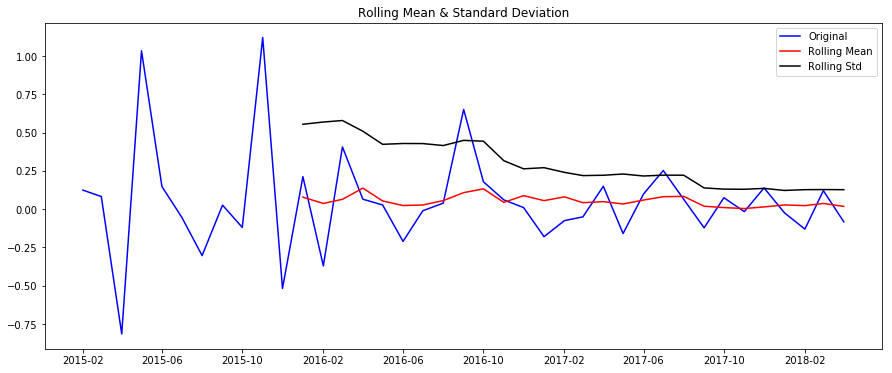

In [18]:
# test the stationarity on differenced log data
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [19]:
df_test(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.786224e+00
p-value                        2.428333e-09
#Lags Used                     2.000000e+00
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64
Result: The series is stationary


In [21]:
kpss_test(ts, regression='ct')

KPSS Statistic: 0.07148738367472447
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


C:\Users\divya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
